<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/%20Lesson_55_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 55: Logistic Regression -  Multiclass Classification

----

###Logistic Regression - Multiclass Classification

So far you have learnt to build a logistic regression model for only two labels. There are a few cases when you have to classify more than two labels. So the classification of such labels is called multiclass classification. In order to practice it, we are going to solve another problem-statement wherein we have to classify different types of glasses based on their chemical and physical composition. Let's call this project glass-type classification.

Also, in this class we will learn to create graphs with Plotly.

**Dataset Description:**

The dataset used in this problem statement involves the classification of samples of different glasses based on their physical and chemical properties. They are as follows:

1. **RI:** Refractive Index

2. **Na:** Sodium

3. **Mg:** Magnesium

4. **Al:** Aluminum

5. **Si:** Silicon

6. **K:** Potassium

7. **Ca:** Calcium

8. **Ba:** Barium

9. **Fe:** Iron

The chemical compositions are measured as the weight per cent in their corresponding oxides such as $\text{Na}_2\text{O}$, $\text{Al}_2\text{O}_3$, $\text{Si}\text{O}_2$ etc.

There are seven types (classes or labels) of glass listed; they are:

* **Class 1:** used for making building windows (float processed)

* **Class 2:** used for making building windows (non-float processed)

* **Class 3:** used for making vehicle windows (float processed)

* **Class 4:** used for making vehicle windows (non-float processed)

* **Class 5:** used for making containers

* **Class 6:** used for making tableware

* **Class 7:** used for making headlamps

A float-type glass refers to the process used to make the glass. The molten glass is introduced into a bath of molten tin, causing the glass to float freely. These glasses are used to absorb heat and UV rays.

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/Glass+Identification


**Citation:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository

---

#### Activity 1: Data Loading

So let's go through the routine steps before we build a logistic regression model and explore the dataset.



In [ ]:
# Load the dataset.
# Import the necessary libraries.
import numpy as np
import pandas as pd

# Load the dataset.
file_path = '/content/glass-types.csv'
df = pd.read_csv(file_path)
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


As you can see from the output, the data columns have strange headers (or titles). Let's load the dataset again without the column headers. For this, you can pass a parameter called `header` inside the `read_csv()` function of the `pandas` module and set its value equal to `None`.

**Syntax:** `pd.read_csv(file_path, header = None)`

In [ ]:
# Load the dataset again without the column headers.
df = pd.read_csv(file_path, header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


It seems like the first column might contain the serial numbers for the samples of glasses collected. Let's display the last 10 rows of the first column (indicated by 0) of the dataset.

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#  Display the last 10 rows of the first column (indicated by 0) of the dataset.
df[0].tail(10)

,0
204,205
205,206
206,207
207,208
208,209
209,210
210,211
211,212
212,213
213,214


So our suspicion was correct. Let's drop this column because we don't need it to build a logistic regression model later.

In [ ]:
# Drop the 0th column as it contains only the serial numbers.
df.drop(columns = 0, inplace = True)

# Get an array of the new set of columns.
df.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

---

#### Activity 2: Renaming Column Headers

Now let's provide the suitable column headers to the dataset so that we know the values of each independent variable for each glass sample. For this, we need to

- Create a Python list containing the suitable column headers as string values. The desired column headers are `'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType'` in the same order.

- Create a Python dictionary containing the current column heads and the desired column headers as key-value pairs.

- Change the column heads by calling the `rename()` function of the `pandas` module on the `pandas` data frame object. The **syntax** to apply the `rename()` function is

  `data_frame_object.rename(python_dictionary)`

  where `python_dictionary` contains the elements as described in the second point.





In [ ]:
column_headers = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
import numpy as np
c_h = np.array(column_headers)
c_h

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType'],
      dtype='<U9')

In [ ]:
type(column_headers)

list

In [ ]:
type(c_h)

numpy.ndarray

In [ ]:
c_h.size

10

In [ ]:
c_h[0]*3

'RIRIRI'

In [ ]:
df.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [ ]:
d = {"apple":"fruit","potato":"veg"}
d["red"] = "color"
d

{'apple': 'fruit', 'potato': 'veg', 'red': 'color'}

In [ ]:
#Create a Python list containing the suitable column headers as string values. Also, create a Python dictionary as described above.
column_headers = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']

# Create the required Python dictionary.
columns_dict = {}
for i in df.columns:
  columns_dict[i] = column_headers[i - 1]

columns_dict

{1: 'RI',
 2: 'Na',
 3: 'Mg',
 4: 'Al',
 5: 'Si',
 6: 'K',
 7: 'Ca',
 8: 'Ba',
 9: 'Fe',
 10: 'GlassType'}

In [ ]:
# Call the 'rename()' function on the data frame object to rename the columns.
df.rename(columns_dict, axis = 1, inplace = True)

# Display the first five rows of the data frame.
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


As you can see, all the column headers are renamed as required.

---

#### Activity 3: Dataset Inspection

Let's look at the kind of values each of the columns have, number of rows and columns in the dataset and whether the dataset has any missing values or not.

In [ ]:
#  Get the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RI         214 non-null    float64
 1   Na         214 non-null    float64
 2   Mg         214 non-null    float64
 3   Al         214 non-null    float64
 4   Si         214 non-null    float64
 5   K          214 non-null    float64
 6   Ca         214 non-null    float64
 7   Ba         214 non-null    float64
 8   Fe         214 non-null    float64
 9   GlassType  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Except for the last column, all the columns have floating-point values as we already observed. There are 214 rows and 10 columns. And there are no missing values in the dataset because all the columns contain 214 non-null values.

Now let's get the count of each glass-type samples in the dataset.

In [ ]:
# Get the count of each glass-type samples in the dataset.
df['GlassType'].value_counts()

,count
GlassType,
2,76
1,70
7,29
3,17
5,13
6,9


Notice that there is no count for glass-type `4`. This means the dataset does not have any sample of glass-type `4`.

Also, glass types `2` and `1` are the most common among all the samples and glass-type `6` is the least. This suggests that the dataset is slightly imbalanced and biased in-favour of types `1` and `2`. Let's also calculate the percentage of these values.

In [ ]:
# Get the percentage of count of each glass-type samples in the dataset.
round(df['GlassType'].value_counts() * 100 / df.shape[0], 2)

,count
GlassType,
2,35.51
1,32.71
7,13.55
3,7.94
5,6.07
6,4.21


Through percentages, we can clearly see the imbalance in the dataset.


---

#### Activity 4: Data Visualisation using Plotly

Plotly another Python library used for Data visualisation. We can create various kinds of graphs like line plot, pie plot, scatter plot etc. using plotly as well.  

**So why should we use Plotly over matplotlib or seaborn?** The reason is:

- There is a hover tool capabilities that can be use to observe anomalies in a large number of data points.

- Also there are endless customizations to make interactive visualisation which can be displayed in Colab/Jupyter notebooks or standalone HTML files as well.


Let's start with a creating a count plot using plotly.

**Steps:**

1. Import the `plotly.express` module for Plotly features.

2. Group the DataFrame `df` by the column `GlassType` without making it a default index column and save the grouping object in a variable .

3. Compute the size of each group with the `size()` function.

>`glass_group_df = glass_group.size()`

> where `glass_group` is the grouping object and `size()` returns a DataFrame   the number of records in each unique group saved as `glass_group_df`.

4.  Create the count plot with the `bar()` function of the plotly library. The syntax for the `bar()` function is:

> **Syntax:**  `plotly.express.bar(data_frame, x, y, color)`

> where

  - `data_frame` : parameter requires the name of the dataframe with the distribution of values
  - `x` : parameter requires a column name / pandas series name / array name from where the values are used to position marks along the x axis.

  - `y` : parameter requires a column name / pandas series name / array name from where the values are used to position marks along the y axis.

  - `color` : parameter requires a column name / pandas series name / array name from where the values are used to assign color to marks.

5. Display the graph using the `show()` function.



Let's create a count plot with plotly to observe the distribution of types of glasses in the dataset.

In [ ]:
glass_group = df.groupby(by = "GlassType", as_index = False)
glass_group.get_group(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
73,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.00,0.00,2
74,1.51596,13.02,3.56,1.54,73.11,0.72,7.90,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [ ]:
glass_group_df = glass_group.size()
glass_group_df

,GlassType,size
0,1,70
1,2,76
2,3,17
3,5,13
4,6,9
5,7,29


In [ ]:
# Create the count plot to observe distribution of glass types using Plotly.

# Import the Plotly library
import plotly.express as px

# Group the DataFrame by the 'GlassType' column
glass_group = df.groupby(by = "GlassType", as_index = False)

# Get the size of each glass type from the group object
glass_group_df = glass_group.size()
print(glass_group_df.head())

# Create the count plot using the 'bar()' function
fig = px.bar(data_frame = glass_group_df, x = "GlassType", y = "size", color = "GlassType")

fig.show()

   GlassType  size
0          1    70
1          2    76
2          3    17
3          5    13
4          6     9


In [ ]:
import plotly.express as px

fig = px.colors.qualitative.swatches()
fig.show()

In [ ]:
df["GlassType"].value_counts()

In [ ]:
import plotly.express.colors
a=df["GlassType"].value_counts()
a= pd.DataFrame(a )
fig = px.bar(data_frame = a, x = a.index, y = "count", color=a.index)
fig.show()


**Note:** The `bar()` function can take in more parameters that can be passed to create more customised data. You may refer to the following document:

https://plotly.com/python-api-reference/generated/plotly.express.bar.html

As it can be observed, count plot is created using plotly. Also if you hover the mouse over the bars, a pop-up appears with the `GlassType` and its size information.

We can also convert the plot to html with the `write_html()` function.

In [ ]:
#Convert the plot to html file.

fig.write_html("Glass Distribution.html")

Check the file explorer on the left-hand side to verify if a new `.html` file is created. We can download that the graph file from the explorer.

Now, let's move ahead create a scatter plot with Plotly with dummy data. The `plotly.express` has the function `scatter()` to create the scatter plot. The syntax of the `scatter()` function is:

> **Syntax:**  `plotly.express.scatter(data_frame, x, y, color, size, hover_data, title)`

> where


Create a scatter plot and show the distribution across labels using the steps below:.

**Steps:**

1. Create two NumPy arrays `x` and `y` with 10 integers from range 1-10 and 1-100 respectively.

2. Create a NumPy array `labels` to divide the above array `data` into three labels - `1` , `2`, `3`  randomly.

3. Create the scatter plot between `x` and `y` and show the distribution of data points with `labels` array with the color parameter.

4. Display the plot.


In [ ]:
x = np.random.randint(1,11,10, dtype = int)
x

array([6, 6, 9, 3, 6, 4, 8, 3, 7, 9])

In [ ]:
y = np.random.randint(1,101,10, dtype = int)
y

array([44,  5, 64, 67, 84, 53, 88, 49, 26, 93])

In [ ]:
labels = np.random.randint(1,3,10)
labels

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 1])

In [ ]:
#Create scatter plot between 'x' and 'y' and show the distribution using 'labels' array

# Import the module
import numpy as np

# Create the 'x' and 'y' arrays
x = np.random.randint(1,11,10, dtype = int)
y = np.random.randint(1,101,10, dtype = int)

# Create the 'labels' array
labels = np.random.randint(1,3,10)

print(f"Array x: {x}")
print(f"Array y: {y}")
print(f"Labels array: {labels}")

# Create the scatter plot
sc_plot = px.scatter(x = x, y = y, color = labels)

# Display the plot
sc_plot.show()

Array x: [10 10  7  3 10  4  6  8  3  2]
Array y: [54 14  9 99 19 92  7 37 57 91]
Labels array: [1 1 2 1 2 1 2 2 1 2]


As it can be observed, the scatter plot is created with the dummy data points and different classes are assigned different colors. Also, when hover over the data points, the pop-up shows three pieces of information `x`, `y` and `color` which refers to the class of the data point.

We can also observe the data points are really small. So, we can include the `size` parameter which should be an array of the same shape as values in `x`. The `size` parameter like `color` can be used to distinguish between different labels as well.

Now, let's create a scatter plot using plotly between the column `Fe` to understand distribution of types of glasses with the Iron (Fe) with the guidlines below:

- `dataframe` will be `df`

- `x` will be an numpy array of size `df.shape[0]` within the range from the minimum value of the column `Fe` to the maximum value + 1 of the column `Fe`.

- `y` will be the values in the column `Fe`

- `size` will be values in the column `GlassType` such that the size of points change with the glass types

- `color` will also be the values in the column `GlassType`such that the color of points change with the glass types.

- `title` will be string representing the plot e.g. "Scatter plot between Fe and Glass Type"

- `color_continuous_scale` will be `px.colors.sequential.Viridis`. This parameter is used to create list of continuous color scale values when the column denoted by `color` contains numeric data.

In [ ]:
#Create the scatter plot for the column 'Fe' values and display the display the distribution of glass types over the column values.


fig = px.scatter(df, x = np.linspace(df['Fe'].min(), df['Fe'].max() + 1, df.shape[0]), y = df['Fe'],
                  size = "GlassType", color = "GlassType",
                 color_continuous_scale = px.colors.sequential.Viridis, title = f'Scatter plot between Fe and Glass Type')

fig.show()

As it can be observed, the scatter plot is created for the column `Fe`. We can distinguish the data points into different types of glass using color with the color bar in the right or even the size (smallest represent label `1` and largest represent label `7`).

The above scatter plot shows that label `5` type of glass can have the highest amout of `Fe`.

**Note:** The different color scales can be observed in the `colors` sub modules of Plotly like `plotly.express.colors.sequential`, `plotly.express.colors.diverging` and `plotly.express.colors.cyclical`.

Let's create the Plotly scatter plot for all the columns to check the distribution of glass types.

In [ ]:
# Create the scatter plot for all the columns in 'df' to observe the distribution of glass types.

for i in list(df.columns[:-1]):
  fig = px.scatter(df, x= np.linspace(df[i].min(), df[i].max() + 1, df.shape[0]), y = df[i],
                   hover_data = ['GlassType'], size = "GlassType",
                   color = "GlassType", color_continuous_scale = px.colors.sequential.Viridis,
                   title = f'Scatter plot between {i} and Glass Type')
  fig.show()

We can observe the scatter plots above to deduce various facts like `RI` reflective index of label `2` glass type is highest.



---

#### Activity 5: Model Building

Let's build a logistic regression model first without balancing the dataset. If the model evaluation parameters suggest that the model is not classifying the labels correctly, then we will first deal with the imbalance and then build a logistic regression model again.

In [ ]:
# Create separate data frames for training and testing the model.
from sklearn.model_selection import train_test_split

# Creating the features data frame holding all the columns accept last column
x = df.iloc[:, :-1]
print(f"First five rows of the features data frame:\n{x.head()}\n")

# Creating the target series that holds last column 'GlassType'
y = df['GlassType']
print(f"First five rows of the GlassType column:\n{y.head()}")

# Splitting the train and test sets using the 'train_test_split()' function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

First five rows of the features data frame:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

First five rows of the GlassType column:
0    1
1    1
2    1
3    1
4    1
Name: GlassType, dtype: int64


In [ ]:
#  Print the shape of all the four variables i.e. 'x_train', 'x_test', 'y_train' and 'y_test'
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(149, 9)
(149,)
(65, 9)
(65,)


In [ ]:
#  Build a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression

# 1. First, call the 'LogisticRegression' module and store it in 'lg_clg' variable.
lg_clf = LogisticRegression()

# 2. Call the 'fit()' function with 'x_train' and 'y_train' as inputs.
lg_clf.fit(x_train, y_train)

# 3. Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
lg_clf.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.6174496644295302

**Note:** This is a preliminary model building step. Hence, we can ignore `ConvergenceWarning` completely.  

So the accuracy score is 61.75% which is not a good score.

Now in the cases of binary classification, we generally create a confusion matrix and print the precision, recall and f1-score values. But in the case of multiclass classification, it best to first check what all labels the classification model identified or detected. For this, you can use either the `unique()` function or the `value_counts()` function.

In [ ]:
y_train_predict = lg_clf.predict(x_train)
type(y_train_predict)
y_train_predict.size

149

In [ ]:
# Get the target values predicted by the logistic regression model on the train set.
y_train_predict = lg_clf.predict(x_train)
y_train_predict = pd.Series(y_train_predict)

print("Classes or labels identified by the logistic regression model:\n", y_train_predict.unique())
print("\nCount of the labels identified by the logistic regression model:")
print(y_train_predict.value_counts())

Classes or labels identified by the logistic regression model:
 [2 1 6 5 7]

Count of the labels identified by the logistic regression model:
2    63
1    62
7    18
6     3
5     3
Name: count, dtype: int64


As you can see, the logistic regression model failed to identify glass-type `3`.

Consequently, it does not makes sense to create a confusion matrix here because the actual target set has all the labels but the predicted target set misses one label (glass-type `3`) among the available (the whole dataset does not have any glass-type `4` sample) labels.

Hence, **in the case of multiclass classification, before creating a confusion matrix, always first check whether the predicted target set has all the labels**.

Let's repeat the above exercise on the test set and find out all the classes identified by the logistic regression model.

In [ ]:
#  Get the target values predicted by the logistic regression model on the test set.
y_test_predict = pd.Series(lg_clf.predict(x_test))

print("Classes or labels identified by the logistic regression model on the test set:\n", y_test_predict.unique())
print("\nCount of the labels identified by the logistic regression model on the test set:")
print(y_test_predict.value_counts())

Classes or labels identified by the logistic regression model on the test set:
 [1 7 2 5]

Count of the labels identified by the logistic regression model on the test set:
2    29
1    22
7    13
5     1
Name: count, dtype: int64


On the test set, the logistic regression model failed to identify labels `3` and `6`. This is clearly a very bad classification model.

In the next activity, we will try to build a logistic regression model again so that it can identify all the different labels before we can evaluate its performance further using confusion matrix, precision, recall and f1-score values.

---



In the previous activity i.e., Logistic Regression - Multi-Class Classification I, we began solving a problem statement based on multiclass-classification. We first built a logistic regression model and it couldn't identify one of the classes. In this activity, we will first balance the dataset using the SMOTE oversampling technique. Then we will build a logistic regression model again. Additionally, we will build a random forest classifier model to see which one gives better results for the glass-type classification problem.



#### Activity 1: Oversampling Using SMOTE

We will now apply the SMOTE method to synthesize the artificial data points in the training dataset to increase the data points for a minority class.

To apply the `SMOTE` method, we have to follow the steps given below:

1. Import the `SMOTE` module from the `imblearn.over_sampling` library.

2. Call the `SMOTE()` function. Inside the function:
   - Pass `sampling_strategy = "all"` parameter as an input. It denotes that after resampling the dataset, the data points for both the majority and minority class should be in equal numbers. In this case, class `2` has `53` data points and other classes have lesser data points. So they should also have `53` rows each.

   - Pass another parameter `random_state = 42` as an input to randomise the synthesis of new data points for the minority classes.

3. Apply the `fit_resample()` function from the `SMOTE` module to synthesize data for the minority class.

In [ ]:
y_train.value_counts()

,count
GlassType,
2,53
1,51
7,19
3,13
5,7
6,6


In [ ]:
#Apply the 'SMOTE()' function to balance the training data.

# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE

# Call the 'SMOTE()' function and store it in the 'smote' variable.
smote = SMOTE(sampling_strategy = "all", random_state = 42)

# Call the 'fit_sample()' function with 'x_train' and 'y_train' datasets as inputs.
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In the code above:

1. We are storing the `SMOTE(sampling_strategy = "all", random_state = 42)` function in the `smote` variable.

2. Then, we are generating the artificial values for both the feature and target values using the `fit_resample()` function and then storing them in the `x_train_resampled` and `y_train_resampled` variables, respectively.

Let's check the type and shapes of the resampled datasets.

In [ ]:
#Check the data-types and shapes of the 'x_train', 'x_train_resampled' and 'y_train_resampled' datasets.
print(type(x_train), x_train.shape)
print(type(x_train_resampled), x_train_resampled.shape)
print(type(y_train_resampled), y_train_resampled.shape)

<class 'pandas.core.frame.DataFrame'> (149, 9)
<class 'pandas.core.frame.DataFrame'> (318, 9)
<class 'pandas.core.series.Series'> (318,)


Now let's print the count of each class in the `y_train_resampled` to check whether all the classes have an equal number of occurrences.

In [ ]:
#  Print the count of all the classes in the train set.
y_train_resampled.value_counts()

,count
GlassType,
2,53
1,53
6,53
5,53
3,53
7,53


---

#### Activity 2: Building Model Again

Now, let's build a logistic regression model again to classify different glass-types with the resampled train set and see whether this time the accuracy score is better.

In [ ]:
#  Build a logistic regression model again with the resampled train set.
lg_clf2 = LogisticRegression()

lg_clf2.fit(x_train_resampled, y_train_resampled)

lg_clf2.score(x_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.720125786163522

So before resampling the train set, the model accuracy was 61.75% approx. After resampling, the accuracy score has increased to 72.01% approx. So clearly, the resampling technique has improved the overall accuracy of the model. However, let's just check again whether all the classes are identified or not.


In [ ]:
# Predict the classes on the train set using the 'predict()' function of the 'LogisticRegression' class.
y_train_resampled_pred = pd.Series(lg_clf2.predict(x_train_resampled))
y_train_resampled_pred.value_counts()

,count
1,60
6,59
5,56
3,49
2,47
7,47


The logistic regression model has identified all the classes in the train set.

Let's also look at how a confusion matrix would look like in the case of multi-class classification.

---

#### Activity 3: Multi-class Classification Confusion Matrix and Classification Report^^

The layout of the confusion matrix in this case (or in general, in the case of multi-class classification) should be as follows:


||Predicted Class `1`|Predicted Class `2`|Predicted Class `3`|Predicted Class `5`|Predicted Class `6`|Predicted Class `7`|
|-|-|-|-|-|-|-|
|Actual Class `1`|TP||||||
|Actual Class `2`||TP|||||
|Actual Class `3`|||TP||||
|Actual Class `5`||||TP|||
|Actual Class `6`|||||TP||
|Actual Class `7`||||||TP|


So the confusion matrix should have 6 rows and 6 columns because there are 6 classes (1, 2, 3, 5, 6 and 7) to be identified.

In [ ]:
#  Create a confusion matrix between the actual and the predicted 'y_train_resampled' values.
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_train_resampled, y_train_resampled_pred)
conf_matrix

array([[32,  8, 13,  0,  0,  0],
       [10, 24, 11,  3,  5,  0],
       [18, 11, 24,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  2],
       [ 0,  0,  0,  0, 53,  0],
       [ 0,  4,  1,  2,  1, 45]])

The diagonal elements in the confusion matrix are the true positive values. So according to the above confusion matrix obtained:

- 32 values of class `1` are **correctly** predicted as class `1` and 8 and 13 values are incorrectly predicted as class `2` and class `3` respectively.

- 24 values of class `2` are **correctly** predicted as class `2` and 10, 11, 3 and 5 values are incorrectly predicted as class `1`, class `3`, class `5` and class `6` respectively.

- 24 values of class `3` are **correctly** predicted as class `3` and 18 and 11 values are incorrectly predicted as class `1` and class `2` respectively.

- 51 values of class `5` are **correctly** predicted as class `5` and 2 values are incorrectly predicted as class `7`.

- 53 values of class `6` are **correctly** predicted as class `6`.

- 45 values of class `7` are **correctly** predicted as class `7` and 4, 1, 2 and 1 values are incorrectly predicted as class `2`, class `3`, class `5` and class `6` respectively.

**Note:** The values reported in the above confusion matrix may vary slightly every time you build a logistic regression model again.

Now let's label the rows and columns of the confusion matrix with the classes so that it is easier to distinguish between the classes in the case of multi-class classification. For this, we will create a Pandas DataFrame object for the confusion matrix. Currently, it is a NumPy array object. Then, we will create a heatmap for the confusion matrix data-frame.

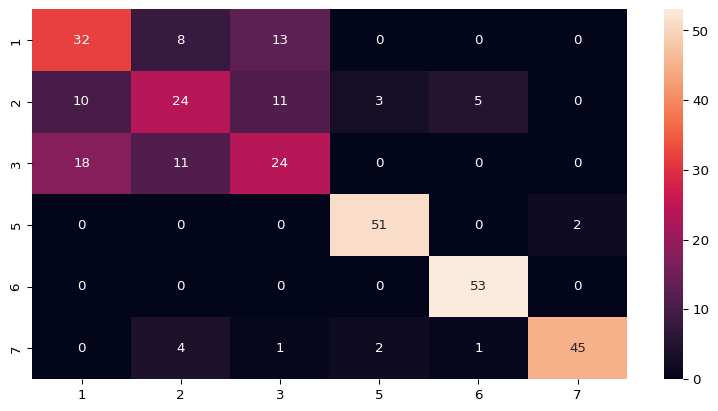

In [ ]:
#  Recreate the confusion matrix between the actual and predicted 'y_train_resampled' values with the row and column labels.
# Create an array containing all the unique labels in increasing order.
labels = pd.Series(y_train_resampled).sort_values(ascending = True).unique()

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
cm_df = pd.DataFrame(conf_matrix, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(cm_df, annot = True)
plt.show()

As you can see, all the rows and columns of the confusion matrix are now labelled and you can easily distinguish between the values reported for different classes in the matrix.

Now let's print the precision, recall and f1-score values to further assess the efficacy of the model built.

In [ ]:
#  Print the classification report for the test set.
print(classification_report(y_train_resampled, y_train_resampled_pred))

              precision    recall  f1-score   support

           1       0.53      0.60      0.57        53
           2       0.51      0.45      0.48        53
           3       0.49      0.45      0.47        53
           5       0.91      0.96      0.94        53
           6       0.90      1.00      0.95        53
           7       0.96      0.85      0.90        53

    accuracy                           0.72       318
   macro avg       0.72      0.72      0.72       318
weighted avg       0.72      0.72      0.72       318



So for classes `1, 2` and `3`, the f1-scores are less than 0.60 because of which the overall accuracy of the model is 72.01%

---


#### Activity 4: Building Random Forest Classifier Model

So even the oversampling approach didn't help us with identifying all the classes accurately through the logistic regression model. Let's try to classify the different types of glasses using the Random Forest Classifier model.

In [ ]:
#  Build a random forest classifier model to predict different glass-types.
# Import the 'RandomForestClassifier' module.
from sklearn.ensemble import RandomForestClassifier

# Create an object of the 'RandomForestClassifier' class and store it in the 'rf_clf' variable.
rf_clf = RandomForestClassifier()

# Call the 'fit()' function on the 'RandomForestClassifier' object with 'x_train' and 'y_train' as inputs.
rf_clf.fit(x_train, y_train)

# Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
rf_clf.score(x_train, y_train)

1.0

So the accuracy score obtained is 100% on the train set. Let's make a confusion matrix and print the f1-scores.

In [ ]:
# Make predictions on the train set and print the count of each of the classes predicted.
rf_y_train_pred = pd.Series(rf_clf.predict(x_train))
rf_y_train_pred.value_counts()

,count
2,53
1,51
7,19
3,13
5,7
6,6


So all the classes have been identified which is expected because the accuracy score is 1.

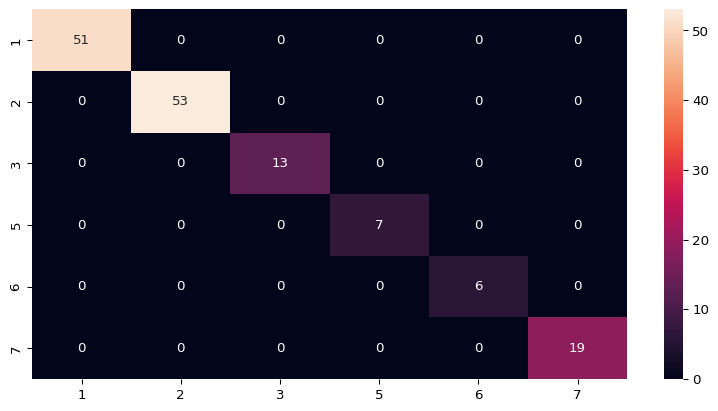

In [ ]:
#Create the confusion matrix between the actual and the predicted values for the train set.
rf_train_conf_matrix = confusion_matrix(y_train, rf_y_train_pred)

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
rf_train_cm_df = pd.DataFrame(rf_train_conf_matrix, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_train_cm_df, annot = True)
plt.show()

The above confusion matrix contains only true positive values. So we don't need to calculate the f1-scores because they all will be 1 for all the glass-types. So let's create a confusion matrix and calculate f1-scores for the test set.

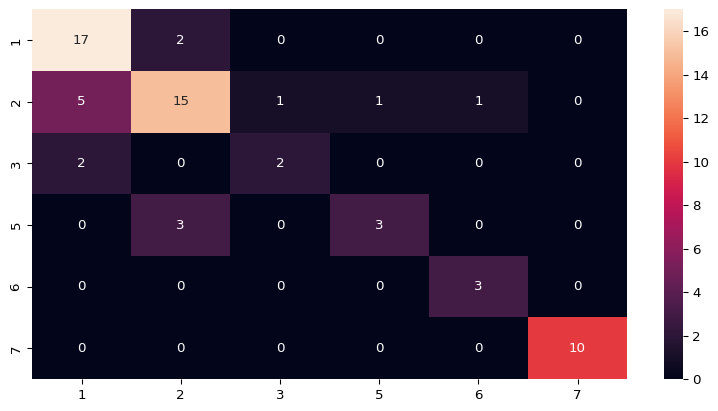

In [ ]:
# Create the confusion matrix between the actual and predicted values for the test set.
rf_y_test_pred = pd.Series(rf_clf.predict(x_test))

rf_test_conf_matrix = confusion_matrix(y_test, rf_y_test_pred)

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
rf_test_cm_df = pd.DataFrame(rf_test_conf_matrix, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_test_cm_df, annot = True)
plt.show()

From the confusion matrix, we can see that there is some misclassification. Let's print the f1-scores for the test set values.

In [ ]:
# Print the classification report for the test set.
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.77        65
   macro avg       0.77      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



So the f1-score is low only for class `3` maybe because it is a minority class. The random forest classifier is working well for all other classes on the non-resampled dataset because for all the labels, the f1-scores are greater than 0.50.

Let's see how it performs when we build it again on the resampled train set.

In [ ]:
#  Build a random forest classifier model on the resampled train set.
rf_clf_res = RandomForestClassifier()

# Call the 'fit()' function on the 'RandomForestClassifier' object with 'x_train' and 'y_train' as inputs.
rf_clf_res.fit(x_train_resampled, y_train_resampled)

# Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
rf_clf_res.score(x_train_resampled, y_train_resampled)

1.0

The accuracy score is almost 100% in this case.

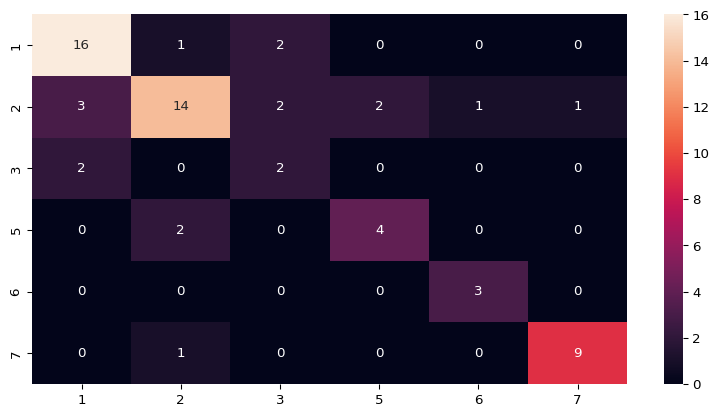

In [ ]:
#  Create a confusion matrix on the test set directly.
# Get the predicted labels on the test set obtained from the RFC model built on the resample train set.
rf_y_test_pred_res = pd.Series(rf_clf_res.predict(x_test))

# Create a confusion matrix.
rf_test_conf_matrix_res = confusion_matrix(y_test, rf_y_test_pred_res)

# Create a Pandas DataFrame object for the confusion matrix created above and labelled with the classes.
rf_test_cm_df_res = pd.DataFrame(rf_test_conf_matrix_res, columns = labels, index = labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_test_cm_df_res, annot = True)
plt.show()

From the above confusion matrix, we can see that there is some misclassification of the classes for the test set.

Let's print the classification report to see if there is any further improvement in the f1-scores especially for class `3`.

In [ ]:
#  Print the classification report for the test set.
print(classification_report(y_test, rf_y_test_pred_res))

              precision    recall  f1-score   support

           1       0.76      0.84      0.80        19
           2       0.78      0.61      0.68        23
           3       0.33      0.50      0.40         4
           5       0.67      0.67      0.67         6
           6       0.75      1.00      0.86         3
           7       0.90      0.90      0.90        10

    accuracy                           0.74        65
   macro avg       0.70      0.75      0.72        65
weighted avg       0.75      0.74      0.74        65



From the classification report, we can see that the f1-scores have decreased probably because of oversampling in the case of the random forest classifier based multi-class classification model. Hence, the previous random forest classifier model (without oversampling) is the most accurate one for this problem statement.

So this is it. You have now learnt how to solve multi-class classification problems using both logistic regression and random forest classification.

Let's stop here. In the next class, you will learn a new machine learning algorithm called Support Vector Machines.